### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import warnings

### Loading the dataset

In [2]:
dataset = pd.read_csv("Placements_Dataset.csv")
dataset.head()

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,Sandra Brown,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,Mrs. Amanda Singleton,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,Matthew Alvarado,56203,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,Christine Smith,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30


In [3]:
print("The shape of the dataset available is : ", dataset.shape)
# Considering 10000 rows from this dataset to perform the Algorithm
dataset = dataset.iloc[:20000,:]

# removing irrelevant values form the dataset
if 'Name of Student' in dataset.columns and 'Roll No.' in dataset.columns:
  dataset = dataset.drop(columns=['Name of Student', 'Roll No.'])
print(dataset.head(2))

The shape of the dataset available is :  (220000, 19)
   No. of DSA questions  CGPA Knows ML Knows DSA Knows Python  \
0                   151  8.52      Yes       Yes          Yes   
1                    24  1.23      Yes        No           No   

  Knows JavaScript Knows HTML Knows CSS Knows Cricket Knows Dance  \
0              Yes         No       Yes            No          No   
1              Yes         No        No           Yes          No   

  Participated in College Fest Was in Coding Club  No. of backlogs  \
0                          Yes                Yes                2   
1                           No                Yes                1   

   Interview Room Temperature  Age of Candidate Branch of Engineering  \
0                        24.2                24      Computer Science   
1                        20.5                18      Computer Science   

   Placement Package  
0              20.01  
1              10.97  


### Visualizing outliners

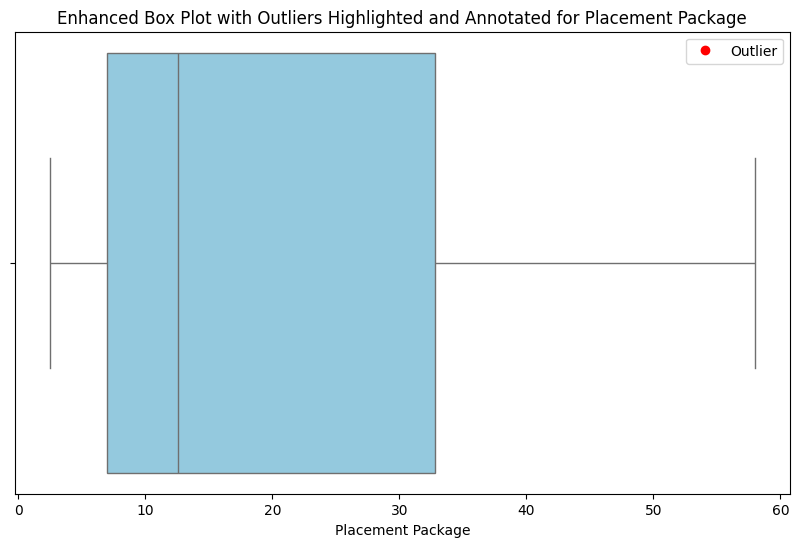

In [4]:
# Calculate IQR for detecting outliers
Q1 = dataset['Placement Package'].quantile(0.25)
Q3 = dataset['Placement Package'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = dataset[(dataset['Placement Package'] < lower_bound) | (dataset['Placement Package'] > upper_bound)]

# Create the box plot without outliers using showfliers=False
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Placement Package', color='skyblue', showfliers=False)
plt.title('Enhanced Box Plot with Outliers Highlighted and Annotated for Placement Package')

# Plot each outlier as a red dot with annotations
for value in outliers['Placement Package']:
    plt.plot(0, value, 'ro', markersize=8)  # Red dot for each outlier
    plt.text(0.1, value, f'{value:.2f}', color='red', va='center', fontsize=9)  # Display value near the dot

# Adding a manual legend for outliers
plt.plot([], [], 'ro', label='Outlier')  # Empty plot to add legend entry for 'Outlier'
plt.legend(loc='upper right')

# Customize labels
plt.xlabel('Placement Package')
plt.show()

### Removing Outliners

In [5]:
print("Outliers:", outliers['Placement Package'].tolist())
Q1 = dataset['Placement Package'].quantile(0.25)
Q3 = dataset['Placement Package'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
dataset = dataset[~((dataset['Placement Package'] < (Q1 - 1.5 * IQR)) | (dataset['Placement Package'] > (Q3 + 1.5 * IQR)))]


Outliers: []


### Checking for missing values

In [6]:
print(dataset.isnull().sum())
dataset = dataset.dropna()

No. of DSA questions              0
CGPA                              0
Knows ML                        415
Knows DSA                         0
Knows Python                    404
Knows JavaScript                421
Knows HTML                      381
Knows CSS                       384
Knows Cricket                     0
Knows Dance                       0
Participated in College Fest      0
Was in Coding Club                0
No. of backlogs                   0
Interview Room Temperature        0
Age of Candidate                  0
Branch of Engineering             0
Placement Package                 0
dtype: int64


In [7]:
# depedent variable y
y = dataset.iloc[:,-1].values
# independent variable X
X = dataset.iloc[:,:-1].values

In [8]:
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_mode.fit(X[:, 2:12])
X[:, 2:12] = imputer_mode.transform(X[:, 2:12])

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(X[:, [0, 12, 13, 14]])
X[:, [0, 12, 13, 14]] = imputer_mean.transform(X[:, [0, 12, 13, 14]])

print(X[0])
print(dataset.isnull().sum())

[151.0 8.52 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 2.0
 24.2 24.0 'Computer Science']
No. of DSA questions            0
CGPA                            0
Knows ML                        0
Knows DSA                       0
Knows Python                    0
Knows JavaScript                0
Knows HTML                      0
Knows CSS                       0
Knows Cricket                   0
Knows Dance                     0
Participated in College Fest    0
Was in Coding Club              0
No. of backlogs                 0
Interview Room Temperature      0
Age of Candidate                0
Branch of Engineering           0
Placement Package               0
dtype: int64


### Encoding independent variables

##### single value variables

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(2, 12):
  X[:, i] = le.fit_transform(X[:, i])
print(X)

[[151.0 8.52 1 ... 24.2 24.0 'Computer Science']
 [24.0 1.23 1 ... 20.5 18.0 'Computer Science']
 [333.0 9.85 0 ... 21.6 25.0 'Mechanical Engineering']
 ...
 [94.0 4.49 0 ... 29.2 23.0 'Electrical Engineering']
 [385.0 5.11 0 ... 26.2 20.0 'Electrical Engineering']
 [195.0 8.2 1 ... 22.1 22.0 'Mechanical Engineering']]


##### multi-valued variables

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[0])

[0.0 1.0 0.0 0.0 151.0 8.52 1 1 1 1 0 1 0 0 1 1 2.0 24.2 24.0]


### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [4, 5, 16, 17, 18]

# Separate the columns to scale and the remaining columns
X_train_to_scale = X_train[:, columns_to_scale]
X_train_rest = np.delete(X_train, columns_to_scale, axis=1)
# Apply scaling only to the specified columns
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_to_scale)
# Merge scaled and unscaled columns back in the original order
X_train[:, columns_to_scale] = X_train_scaled

# for test data
X_test_to_scale = X_test[:, columns_to_scale]
X_test_rest = np.delete(X_test, columns_to_scale, axis=1)
X_test_scaled = sc.transform(X_test_to_scale)
X_test[:, columns_to_scale] = X_test_scaled
print(X_train[0])

[0.0 1.0 0.0 0.0 -0.21138273200629137 0.32010873990301597 0 0 0 1 1 1 1 0
 1 1 -1.4633768282085629 0.3115919480076398 -1.5153897430611423]


In [13]:
print(y_train.shape)
print(np.isnan(y_train).any())
print(np.unique(y_train))
print(X_train.shape, y_train.shape)

(14448,)
False
[ 2.5   2.51  2.52 ... 57.94 57.96 57.97]
(14448, 19) (14448,)


### testing accuracy 

In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define regression models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression()
}

# Evaluate each model
for name, model in models.items():
    print(f"{name}:")
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-validation MSE: {-cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")
    
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"R-squared: {r2:.3f}")
    print("\n" + "="*60 + "\n")

Random Forest:
Cross-validation MSE: 80.265 (+/- 1.771)
Mean Absolute Error: 6.018
Mean Squared Error: 85.798
R-squared: 0.655


Gradient Boosting:
Cross-validation MSE: 76.635 (+/- 1.768)
Mean Absolute Error: 5.969
Mean Squared Error: 82.935
R-squared: 0.667


Support Vector Regression:
Cross-validation MSE: 119.516 (+/- 3.133)
Mean Absolute Error: 7.528
Mean Squared Error: 125.703
R-squared: 0.495


K-Nearest Neighbors:
Cross-validation MSE: 128.424 (+/- 3.964)
Mean Absolute Error: 8.280
Mean Squared Error: 133.005
R-squared: 0.466


Decision Tree:
Cross-validation MSE: 157.004 (+/- 1.339)
Mean Absolute Error: 7.767
Mean Squared Error: 159.431
R-squared: 0.359


Linear Regression:
Cross-validation MSE: 115.923 (+/- 2.948)
Mean Absolute Error: 8.609
Mean Squared Error: 121.528
R-squared: 0.512




In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the model
gbr = GradientBoostingRegressor()

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.9, 1.0],
    'max_features': ['auto', 'sqrt'],
}

# Set up the randomized search
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, 
                                   scoring='neg_mean_absolute_error', 
                                   n_iter=20,  # Number of parameter settings to sample
                                   cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = -random_search.best_score_

# Print the best parameters and score
print("Best Parameters from Randomized Search:")
for param, value in best_params.items():
    print(f"{param}: {value}")

print(f"\nBest MAE from Randomized Search: {best_score}")


Fitting 5 folds for each of 18000 candidates, totalling 90000 fits


KeyboardInterrupt: 